In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Look at the columns in the class 'measurement'
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x266fd029e50>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [10]:
#Look at the columns in the class 'station'
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x266fd0a8090>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [10]:
# Find the most recent date in the data set.
recent_date_query = session.query(func.max(measurement.date)).first()
recent_date_query

('2017-08-23',)

(0.08, '2010-01-01')
(0.0, '2010-01-02')
(0.0, '2010-01-03')
(0.0, '2010-01-04')
(None, '2010-01-06')


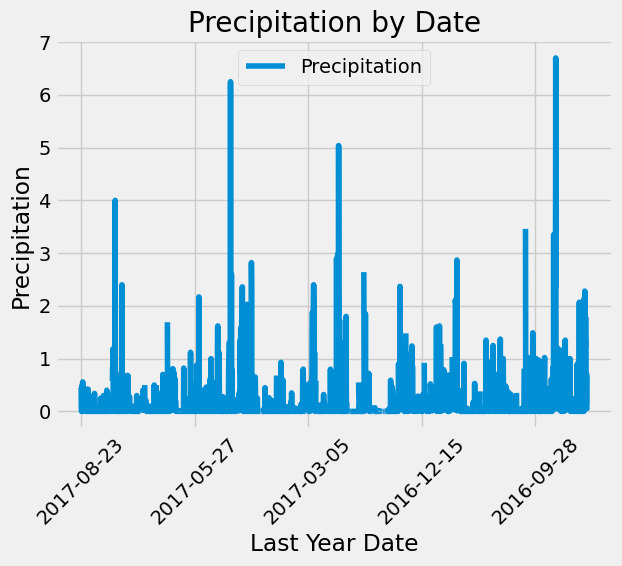

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
for row in session.query(measurement.prcp, measurement.date).limit(5).all():
    print(row)

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(last_year)

# Perform a query to retrieve the date and precipitation scores
last_year_data = session.query(measurement.prcp, measurement.date).filter(measurement.date >= last_year).all()

#print (last_year_data)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_last_year_data = pd.DataFrame(last_year_data)
df_last_year_data.head()

df_renamed = df_last_year_data.rename(columns={'prcp':'Precipitation', 'date':'Last Year Date'})
df_renamed.head()

# Sort the dataframe by date
df_sorted_date = df_renamed.sort_values('Last Year Date', ascending=False)
df_sorted_date.head()

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted_date.plot(x='Last Year Date', y='Precipitation', title='Precipitation by Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary=df_sorted_date.describe()
summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_stations_query = session.query(station).count()
total_stations_query

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(
        func.min(measurement.tobs).label('min_temperature'),
        func.max(measurement.tobs).label('max_temperature'),
        func.avg(measurement.tobs).label('avg_temperature')
    ).filter(measurement.station == 'USC00519281').first()

min_temperature = most_active.min_temperature
max_temperature = most_active.max_temperature
avg_temperature = most_active.avg_temperature

print(f"Lowest Temperature: {min_temperature}")
print(f"Highest Temperature: {max_temperature}")
print(f"Average Temperature: {avg_temperature}")


Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


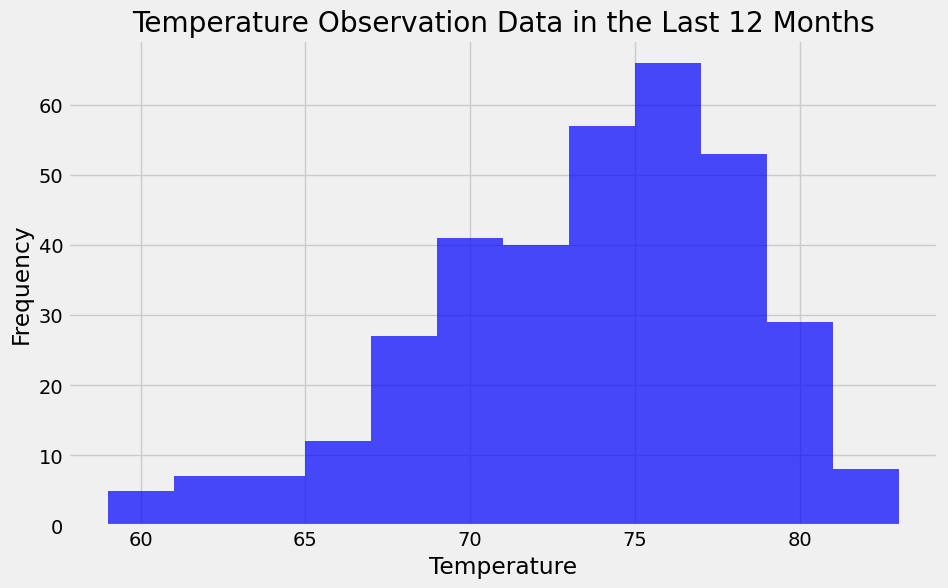

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mas_12_months = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= last_year).all()

# Create a dataFrame
df = pd.DataFrame(mas_12_months, columns=['tobs'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(df, bins=12, color='blue', alpha=0.7)
plt.title('Temperature Observation Data in the Last 12 Months')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
#mas_12_months

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


# Close Session

In [24]:
# Close Session
session.close()